# Calculating Labor-Values using Gauss-Seidel to Solve the Inverse-Leontief Matrix


## Simplest Case : artificial open economy 


| Industry      | Raw Materials | Services | Manufacturing |  Compensation|
|---------------|---------------|----------|---------------|---      |
| Raw Materials | 0.02          | 0.04     | 0.04          | 400  |
| Services      | .05           | .03      | 0.01          | 200  |
| Manufacturing | .2            | .01      | .1            | 600  |


At such a small scale the procedure is very simple. 

In [144]:
import numpy as np
import pandas as pd

A=np.array([[.02, .04, .04],
            [.05, .03, .01],
            [.2, .01,.1]])

b=np.array([400,200,600])


def inverse_leontief(A,b):
    
    """gauss-seidel to solve system of equations
    
    Parameters
    ..........
    
    A :
        a 2-dimensional mxm numpy array (matrix)
    
    b :
        a 1-dimensional mx1 numpy array (vector)
    
    x :
        a 1-dimensional mx1 numpy array (vector)
    
    Returns
    ..........
    
    solution :
        a 1- dimensional array mx1 (vector)

    """
    n=A.shape[0]
    solution=np.linalg.inv(np.eye(n,n) - A).dot(b)
    return solution

def print_labor_values(result):
    m=result.shape[0]
    index=data.index[:m]
    print('Labor content per £ for each industry...')
    for i,j in zip(index,result):
        print('%s : %s per £' % (i,j))
    
inverse_leontief(A,b)

array([449.24105739, 237.27154279, 769.13436323])

## Iterative Algorithms to Solve Systems of Equations 

## Jacobi

![diagno](https://wikimedia.org/api/rest_v1/media/math/render/svg/b27a04af9ab99bd7ceadf07a6292810ad2703825)

In [7]:
## split into three pieces
def jacobi(A, b,num_iterations):
    D = np.diag(np.diag(A))
    L = np.tril(A,-1)
    U=np.triu(A,1)
    x = np.ones((A.shape[0]))
    xn = x
    for i in range(25):
        xn = np.linalg.inv(D).dot(b - (L + U).dot(xn))
    return xn


## Gauss-Seidel 

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/5815855c28d0f03d019e2662ad2f74aa20fca8ce)

where 

![image2](https://wikimedia.org/api/rest_v1/media/math/render/svg/499e65fdc0563093db6f0d135a9fa0f135e31d0b) and ![image3](https://wikimedia.org/api/rest_v1/media/math/render/svg/07bfa5ff410e80c64664b0126cba0a878385c266)

In [ ]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

In [36]:
def gauss(A,b,n_iterations):
    
    """gauss-seidel to solve system of equations
    
    Parameters
    ..........
    
    
    Returns
    ..........
    
    """
    m=A.shape[0]
    L = np.tril(A)
    U = A - L
    T= -np.linalg.inv(L).dot(U)
    C= np.linalg.inv(L).dot(b)
    x=np.random.randint(0,1,(m,1))
    xn=x
    for i in range(n_iterations):
        xn=T.dot(xn) + C[:,np.newaxis]
    
    return(xn)

In [150]:
## unit tests 
## diagonally dominant 
A=np.array([[3,-2,1],[1,-3,2],[-1,2,4]]); b=np.array([11,13,2])
display(np.linalg.inv(A).dot(b))
display(gauss(A,b,10))

## positive-definite 
A=np.array([[2,-1,0],[-1,2,-1],[0,-1,2]]); b=np.array([11,13,2])
display(np.linalg.inv(A).dot(b))
display(gauss(A,b,10))

### positive-definite jacobi 
A=np.array([[2,1],[5,7]]); b=np.array([11,13])
jacobi(A,b,25)

array([ 1.2972973 , -2.51351351,  2.08108108])

array([[ 1.29665834],
       [-2.51326048],
       [ 2.08079482]])

array([15.25, 19.5 , 10.75])

array([[15.22998047],
       [19.47998047],
       [10.73999023]])

array([ 7.11110202, -3.22220342])

## Real Economy 

### Thank you to Paul Cockshott for providing the cleaned-up data. 

In [136]:
file='/Users/djamillakhdarhamina/Desktop/io.csv'
with open(file, 'rt') as f:
    data=pd.read_csv(f,index_col=0)
    
data

,"Agriculture, forestry & fishing",Mining & quarrying,"Food, beverages & tobacco","Textiles, apparel & leather",Wood products & furniture,"Paper, paper products & printing",Industrial chemicals,Drugs & medicines,Petroleum & coal products,Rubber & plastic products,...,Statistical discrepancy,Total,Private domestic consumption,Government consumption,Total GFCF,Changes in Stocks,Exports of goods and services,Total final demand,Imports of goods and services,Gross output
"Agriculture, forestry & fishing",3327,0,9993,245,182,44,9,1,0,143,...,0,15459,5872,49,90,113,1830,7955,-3703,19711
Mining & quarrying,9,881,24,10,6,41,261,5,4469,10,...,0,15517,719,34,18,-256,7849,8364,-7709,16172
"Food, beverages & tobacco",2137,28,7067,263,27,91,212,122,27,48,...,0,20449,28655,410,114,129,7122,36431,-11213,45667
"Textiles, apparel & leather",92,2,25,3943,349,111,65,69,1,202,...,0,10009,11039,242,43,-16,6309,17616,-12313,15313
Wood products & furniture,42,40,33,21,2412,106,26,3,2,48,...,0,7293,3516,436,1058,0,517,5527,-3336,9484
"Paper, paper products & printing",169,28,1446,361,165,6367,492,169,51,280,...,0,25361,4763,1067,76,65,3049,9021,-6691,27691
Industrial chemicals,1020,50,440,1078,191,838,5415,346,159,2493,...,0,17556,4404,170,229,-187,12643,17259,-10961,23853
Drugs & medicines,31,4,145,23,11,24,97,503,5,38,...,0,4221,883,31,81,-23,2697,3670,-1631,6260
Petroleum & coal products,169,13,140,14,27,47,927,28,532,29,...,0,5918,3833,240,96,30,3458,7656,-3540,10034
Rubber & plastic products,125,46,1376,288,317,248,704,117,23,777,...,0,11929,1207,207,205,-41,2728,4305,-3914,12320


In [153]:
l=data.loc['Compensation of employees',:'Real estate & business services']
A=data.loc[:'Real estate & business services',:'Real estate & business services']
sol=inverse_leontief(A,l)

In [154]:
print_labor_values(sol)

Labor content per £ for each industry...
Agriculture, forestry & fishing : -69.57455015694153 per £
Mining & quarrying : 33.37338017761195 per £
Food, beverages & tobacco : 23.550911611995833 per £
Textiles, apparel & leather : 4.065180908703523 per £
Wood products & furniture : 2.4987301922550196 per £
Paper, paper products & printing : -2.1269582835472924 per £
Industrial chemicals : 25.0987542552332 per £
Drugs & medicines : -6.52772011462004 per £
Petroleum & coal products : -12.423922589165809 per £
Rubber & plastic products : -25.747696247556803 per £
Non-metallic mineral products : -5.641942651724895 per £
Iron & steel : 33.76825087039024 per £
Non-ferrous metals : -0.14281931684953442 per £
Metal products : -41.440928347769756 per £
Non-electrical machinery : -3.8283703809247527 per £
Office & computing machinery : -4.845216309257273 per £
Electrical apparatus, nec : -8.65450875986498 per £
Radio, TV & communication equipment : 9.810758114463425 per £
Shipbuilding & repairing :

In [148]:
sol=gauss(A,l,20)

In [149]:
print_labor_values(sol)

Labor content per £ for each industry...
Agriculture, forestry & fishing : [-5.3829647e+12] per £
Mining & quarrying : [1.15829059e+13] per £
Food, beverages & tobacco : [2.51587842e+13] per £
Textiles, apparel & leather : [4.00315349e+12] per £
Wood products & furniture : [2.31373279e+12] per £
Paper, paper products & printing : [-4.32427875e+12] per £
Industrial chemicals : [4.95840497e+12] per £
Drugs & medicines : [-5.74787267e+12] per £
Petroleum & coal products : [-1.18081691e+13] per £
Rubber & plastic products : [-5.72150615e+13] per £
Non-metallic mineral products : [-4.77389321e+12] per £
Iron & steel : [4.95845623e+12] per £
Non-ferrous metals : [-7.71057791e+11] per £
Metal products : [-1.94145984e+13] per £
Non-electrical machinery : [-8.6604095e+11] per £
Office & computing machinery : [-1.45147665e+11] per £
Electrical apparatus, nec : [-7.32200055e+12] per £
Radio, TV & communication equipment : [-1.6282994e+12] per £
Shipbuilding & repairing : [-2.282799e+13] per £
Oth

In [240]:
jacobi(A.values,l.values,25)

array([-1.02316775e+19, -1.62612715e+19, -1.07824708e+19, -3.47764091e+18,
       -2.06339770e+18, -4.59317118e+18, -3.57688602e+18, -4.69999868e+18,
       -1.27924813e+19, -1.74684026e+19, -4.69872785e+18, -3.46579963e+18,
       -3.26792265e+18, -9.72996864e+18, -2.57654634e+18, -9.84228722e+17,
       -8.44734341e+18, -2.17906082e+18, -9.64581448e+18, -4.73450423e+18,
       -2.16280772e+18, -2.18209271e+17, -1.65171667e+19, -2.02138865e+19,
       -1.39357392e+18, -3.32121674e+17, -1.06397517e+19, -9.96754324e+19,
       -7.10848002e+18, -1.51070296e+19, -4.46627276e+18, -4.87584115e+18,
       -1.77134557e+18])

In [48]:
l=data.loc['Total ',:'Community, social & personal services']
A=data.loc[:'Community, social & personal services',:'Community, social & personal services']
inverse_leontief(A.values, l.values)
jacobi(A.values,l.values, 20)

array([1.81020065e+18, 2.87696365e+18, 1.90764767e+18, 6.15268400e+17,
       3.65058795e+17, 8.12629352e+17, 6.32826964e+17, 8.31529402e+17,
       2.26326113e+18, 3.09053074e+18, 8.31304565e+17, 6.13173426e+17,
       5.78164793e+17, 1.72143772e+18, 4.55845667e+17, 1.74130926e+17,
       1.49451412e+18, 3.85522054e+17, 1.70654906e+18, 8.37634165e+17,
       3.82646535e+17, 3.86058458e+16, 2.92223693e+18, 3.57626504e+18,
       2.46552769e+17, 5.87593648e+16, 1.88239763e+18, 1.76346970e+19,
       1.25764081e+18, 2.67275378e+18, 7.90178332e+17, 8.62639662e+17,
       3.13388583e+17])

In [201]:
file='/Users/djamillakhdarhamina/Desktop/io-1990.csv'
with open(file, 'rt') as f:
    data=pd.read_csv(f,index_col=0)
    
data

,"Agriculture, forestry & fishing",Mining & quarrying,"Food, beverages & tobacco","Textiles, apparel & leather",Wood products & furniture,"Paper, paper products & printing",Industrial chemicals,Drugs & medicines,Petroleum & coal products,Rubber & plastic products,...,Aircraft,Professional goods,Other manufacturing,"Electricity, gas & water",Construction,Wholesale & retail trade,Restaurants & hotels,Transport & storage,Communication,"Community, social & personal services"
"Agriculture, forestry & fishing",3327,0,9993,245,182,44,9,1,0,143,...,1,1,1,3,84,408,665,47,5,227
Mining & quarrying,9,881,24,10,6,41,261,5,4469,10,...,5,2,1,7952,159,37,2,10,2,80
"Food, beverages & tobacco",2137,28,7067,263,27,91,212,122,27,48,...,16,11,10,103,266,3483,3358,307,143,1601
"Textiles, apparel & leather",92,2,25,3943,349,111,65,69,1,202,...,8,14,135,11,415,1932,356,108,49,980
Wood products & furniture,42,40,33,21,2412,106,26,3,2,48,...,3,4,34,11,2470,242,131,45,26,533
"Paper, paper products & printing",169,28,1446,361,165,6367,492,169,51,280,...,71,93,190,317,766,2900,431,833,207,1544
Industrial chemicals,1020,50,440,1078,191,838,5415,346,159,2493,...,52,57,93,114,700,625,65,156,35,1003
Drugs & medicines,31,4,145,23,11,24,97,503,5,38,...,4,6,5,16,58,109,18,21,7,2876
Petroleum & coal products,169,13,140,14,27,47,927,28,532,29,...,20,1,8,862,162,704,74,1081,61,226
Rubber & plastic products,125,46,1376,288,317,248,704,117,23,777,...,27,237,219,138,1062,1478,27,538,321,322


In [ ]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

is_pos_def(A)

In [202]:
A=data.loc[:'Community, social & personal services',:]
l=data.loc['Compensation of employees',:]
result=inverse_leontief(A,l)

In [307]:
## calculate surplus value
C=data.loc['C',:]
V=data.loc['V',:]
S=data.loc['S',:]
L=data.loc['L',:]
surplus_value=pd.eval('S/(C+V)')
## exclude anamolous labor value 
df=np.c_[L,surplus_value]
subset=df[df[:,0]< 20000]
## exclude anamolous surplus value 
df_subset=df[df[:,1]< surplus_value.median()]


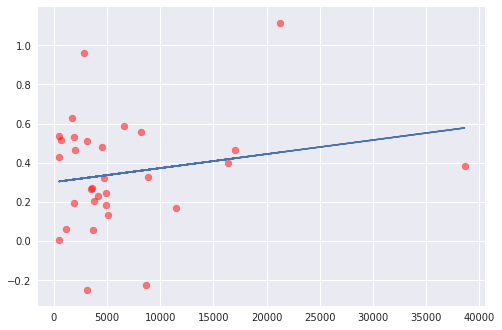

In [300]:
import seaborn as sns
import numpy.polynomial.polynomial as poly

with plt.style.context('seaborn'):
    plt.scatter(L, surplus_value, c='red', alpha=.5)
    
coefs = poly.polyfit(L, surplus_value, 1)
ffit = poly.polyval(L, coefs)
plt.plot(L, ffit)


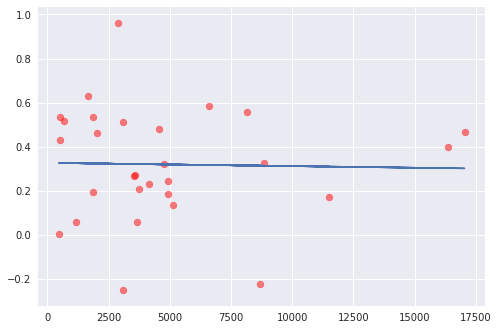

In [305]:
import seaborn as sns
import numpy.polynomial.polynomial as poly


with plt.style.context('seaborn'):
    plt.scatter(subset[:,0], subset[:,1], c='red', alpha=.5)
    
coefs = poly.polyfit(subset[:,0], subset[:,1], 1)
ffit = poly.polyval(subset[:,0], coefs)
plt.plot(subset[:,0], ffit)

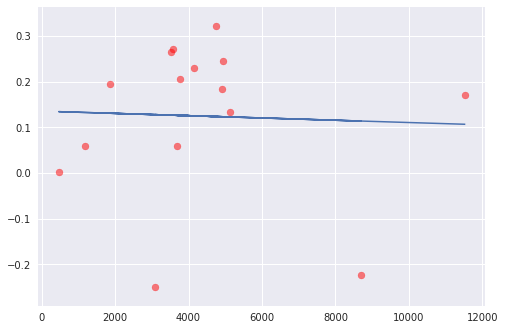

In [308]:
with plt.style.context('seaborn'):
    plt.scatter(df_subset[:,0], df_subset[:,1], c='red', alpha=.5)
    
coefs = poly.polyfit(df_subset[:,0], df_subset[:,1], 1)
ffit = poly.polyval(df_subset[:,0], coefs)
plt.plot(df_subset[:,0], ffit)

In [377]:
file='/Users/djamillakhdarhamina/Desktop/us-io.csv'
with open(file, 'rt') as f:
    data=pd.read_csv(f,index_col='Name')
    

df=data.replace('...','0')
df=df.astype(np.float64)

df.dtypes

Farms                                                                  float64
Forestry, fishing, and related activities                              float64
Oil and gas extraction                                                 float64
Mining, except oil and gas                                             float64
Support activities for mining                                          float64
                                                                        ...   
State and local: Gross investment in intellectual property products    float64
Sum of Final Uses (GDP) Selected                                       float64
Sum of Final Uses (GDP) Not Selected                                   float64
Total Final Uses (GDP)                                                 float64
Total Commodity Output                                                 float64
Length: 98, dtype: object

In [366]:
index=set(df.columns.values)
columns=set(df.index.values)

index&columns

{'Accommodation',
 'Administrative and support services',
 'Air transportation',
 'Ambulatory health care services',
 'Amusements, gambling, and recreation industries',
 'Apparel and leather and allied products',
 'Broadcasting and telecommunications',
 'Chemical products',
 'Computer and electronic products',
 'Computer systems design and related services',
 'Construction',
 'Data processing, internet publishing, and other information services',
 'Educational services',
 'Electrical equipment, appliances, and components',
 'Fabricated metal products',
 'Farms',
 'Federal Reserve banks, credit intermediation, and related activities',
 'Federal general government (defense)',
 'Federal general government (nondefense)',
 'Federal government enterprises',
 'Food and beverage and tobacco products',
 'Food and beverage stores',
 'Food services and drinking places',
 'Forestry, fishing, and related activities',
 'Funds, trusts, and other financial vehicles',
 'Furniture and related products',

In [379]:
A=data.loc[:'State and local government enterprises', :'State and local government enterprises']
l=data.loc['Compensation of employees',:'State and local government enterprises']

Farms                                        object
Forestry, fishing, and related activities    object
Oil and gas extraction                       object
Mining, except oil and gas                   object
Support activities for mining                object
                                              ...  
Federal general government (defense)         object
Federal general government (nondefense)      object
Federal government enterprises               object
State and local general government           object
State and local government enterprises       object
Length: 71, dtype: object

In [ ]:
# io_index_values=data.index.values[1:]
# name_index_values=data['Industries/Commodities'].values[1:]

# io_column_values=data.columns.values[1:]
# name_column_values=data.iloc[0,1:].values
# val=data.iloc[1:,1:].values

# indexes=pd.MultiIndex.from_arrays([io_index_values,name_index_values], names=['IOCode','Name'])
# columns=pd.MultiIndex.from_arrays([io_column_values,name_column_values], names=['Industry_Code','Industry_Name'])

# data_indexed=pd.DataFrame(val, index=indexes, columns=columns)
# data_indexed